In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('data.xlsx')
data.head()

,Nombre y apellidos,Edad,Sexo,App HTA,App DM,App AB,App Cardiopatía Isquémica,App Vasculitis,App Colagenopatías,Etiología del empaquetamiento,...,Presencia de hipotensión arterial o shock,Tiempo quirúrgico,# de hemoderivados usados,componentes triada letal,traumas asociado,VAM,Reempaquetamiento,Apache II,Sofa,Estado al egreso
0,Maikel Junior Alfaro Lopez,16,1,1,1,1,1,1,1,2,...,0,2,4,2,4,1,1,7,3,1
1,Ismany Pedraza Herrera,52,1,0,1,1,1,1,1,5,...,0,3,9,3,4,0,1,17,13,2
2,Yuniel Alvarez Medina,32,1,1,1,0,1,1,1,3,...,0,2,4,1,0,1,1,23,9,1
3,Ciro Cardenas Bermudez,70,1,0,0,1,0,1,1,1,...,1,2,2,1,0,0,1,4,7,1
4,Owen Antonio Garcia alvarez,46,1,1,0,0,1,1,1,2,...,0,3,6,3,4,0,1,8,15,2


In [3]:
data.columns

Index(['Nombre y apellidos', 'Edad', 'Sexo', 'App HTA', 'App DM', 'App AB',
       'App Cardiopatía Isquémica', 'App Vasculitis', 'App Colagenopatías',
       'Etiología del empaquetamiento', 'Número de compresas utilizadas',
       'Horas transcurridas al desempaquetamiento',
       'Daño orgánico tubular asociado', 'Peritonitis asociada',
       'Lesión de vía biliar asociada',
       'Presencia de hipotensión arterial o shock  ', 'Tiempo quirúrgico',
       '# de hemoderivados  usados', 'componentes triada letal',
       'traumas asociado', 'VAM', 'Reempaquetamiento', 'Apache II', 'Sofa',
       'Estado al egreso'],
      dtype='object')

In [4]:
data.drop('Nombre y apellidos', axis=1, inplace = True)

Text(0, 0.5, 'Número de casos')

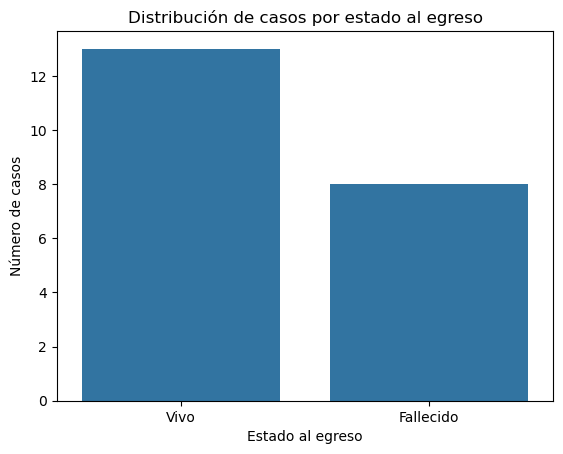

In [5]:
sns.countplot(x='Estado al egreso', data=data)
plt.title('Distribución de casos por estado al egreso')
plt.xticks(ticks=[0, 1], labels=['Vivo', 'Fallecido'])
plt.xlabel('Estado al egreso')
plt.ylabel('Número de casos')

In [6]:
data['Estado al egreso'].value_counts()

Estado al egreso
1    13
2     8
Name: count, dtype: int64

In [7]:
y = data['Estado al egreso']
X = data.drop('Estado al egreso', axis=1)
X.var(axis=0)

Edad                                           282.247619
Sexo                                             0.190476
App HTA                                          0.247619
App DM                                           0.128571
App AB                                           0.161905
App Cardiopatía Isquémica                        0.161905
App Vasculitis                                   0.000000
App Colagenopatías                               0.000000
Etiología del empaquetamiento                    1.347619
Número de compresas utilizadas                   0.447619
Horas transcurridas al desempaquetamiento        0.533333
Daño orgánico tubular asociado                   0.190476
Peritonitis asociada                             0.090476
Lesión de vía biliar asociada                    0.047619
Presencia de hipotensión arterial o shock        0.161905
Tiempo quirúrgico                                0.561905
# de hemoderivados  usados                       6.461905
componentes tr

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X = scaler.fit_transform(X)

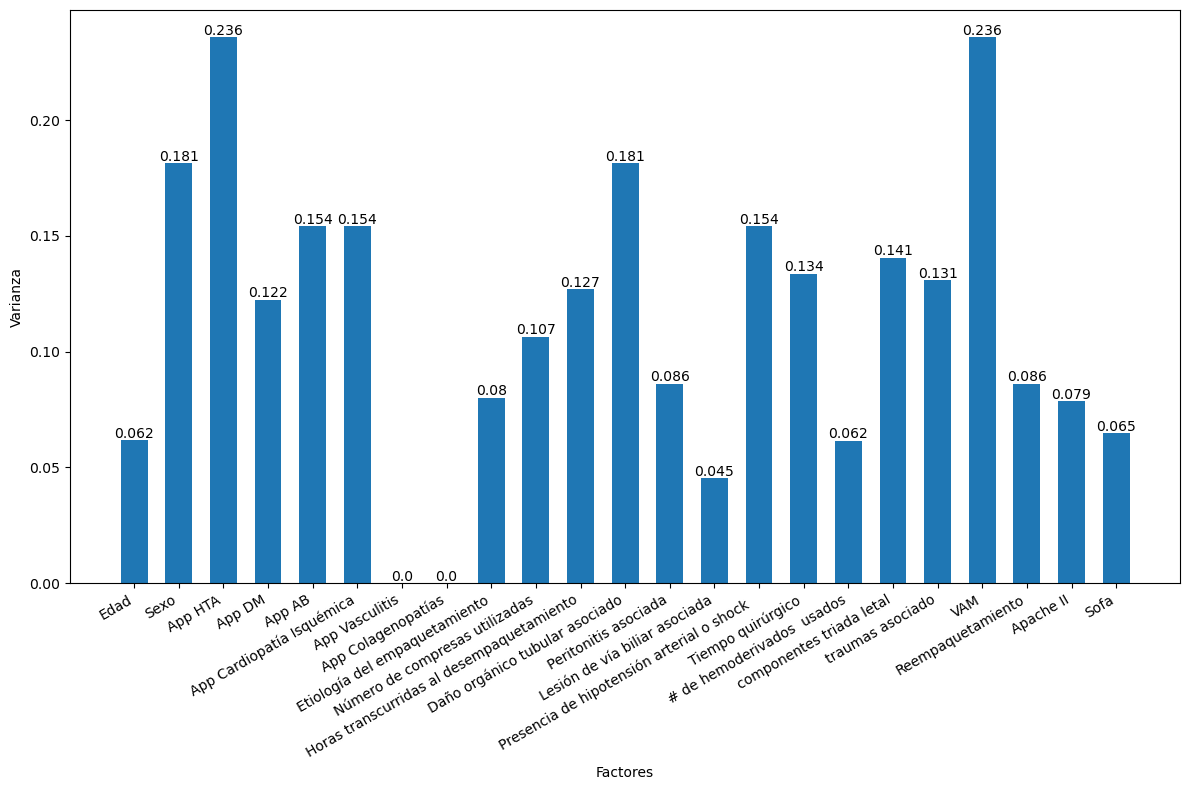

In [9]:
fig , ax = plt.subplots()

fig.set_size_inches(12,8)

x = X.columns
y_ = scaled_X.var(axis=0)

ax.bar(x, y_, width=0.6)
ax.set_xlabel('Factores')
ax.set_ylabel('Varianza')

for index, value in enumerate(y_):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')
    
fig.autofmt_xdate()
plt.tight_layout()    

In [10]:
X.drop(['App Vasculitis', 'App Colagenopatías', 'Lesión de vía biliar asociada'], axis=1, inplace=True)

In [11]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2 , k = 10)
selector.fit_transform(X,y)
    
selected_indeces = selector.get_support(indices=True)
features = X.columns[selected_indeces]

features

Index(['Edad', 'App Cardiopatía Isquémica',
       'Horas transcurridas al desempaquetamiento',
       'Daño orgánico tubular asociado', '# de hemoderivados  usados',
       'componentes triada letal', 'traumas asociado', 'VAM', 'Apache II',
       'Sofa'],
      dtype='object')

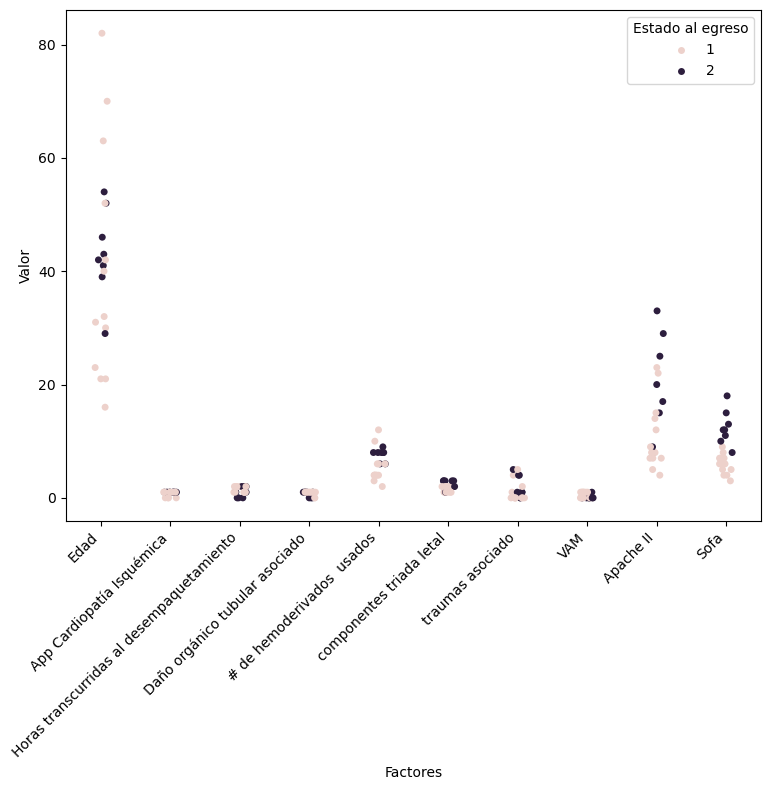

In [12]:
to_plot = pd.melt(data[features].join(y),
                  id_vars= 'Estado al egreso',
                  var_name= 'features',
                  value_name= 'value'
                  )

plt.figure(figsize=(8,8))
sns.stripplot(data=to_plot, x='features', y='value', hue='Estado al egreso', jitter=True)
plt.xlabel('Factores')
plt.ylabel('Valor')
plt.legend(title='Estado al egreso')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<Axes: >

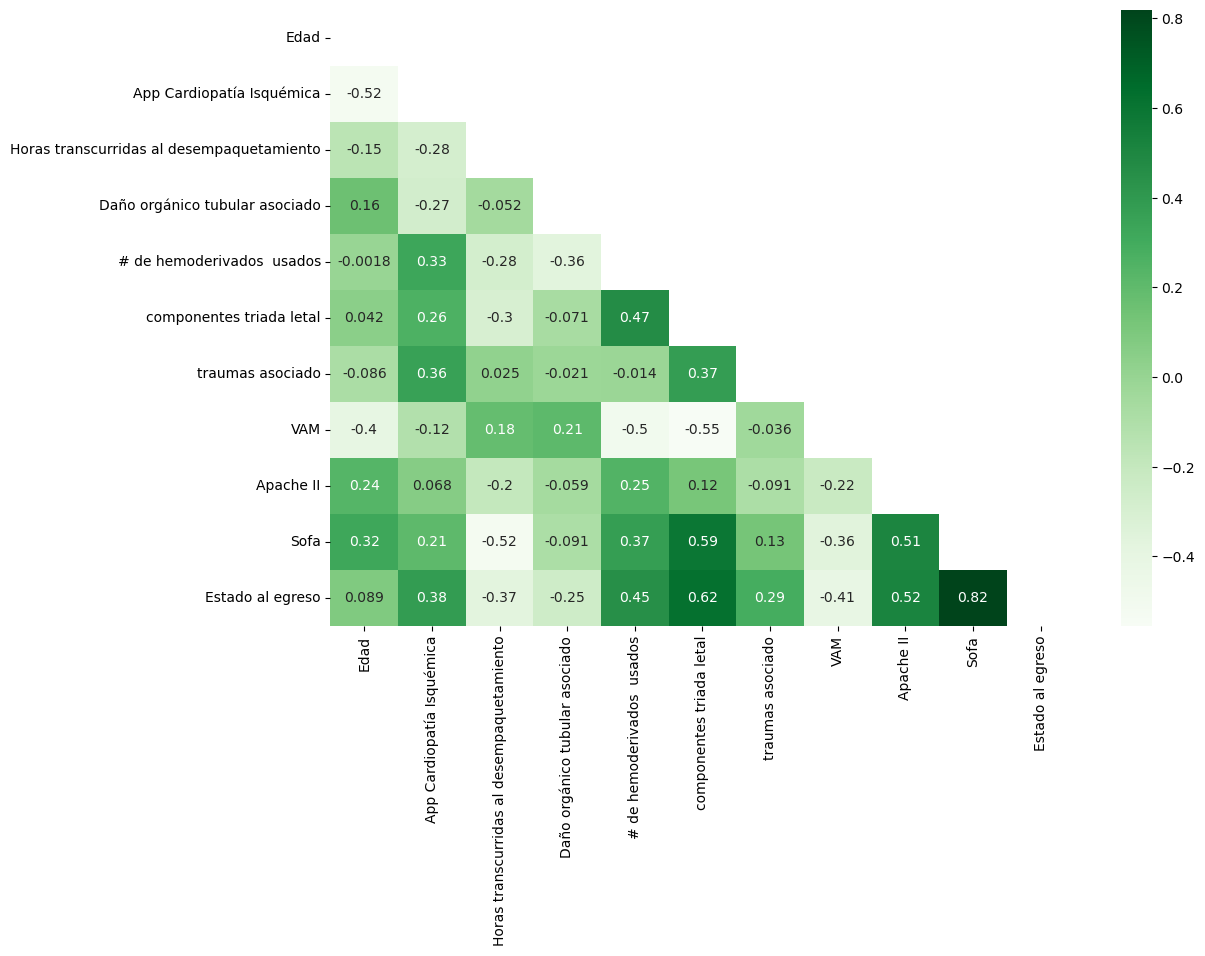

In [15]:
matrix = X[features].join(y).corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(matrix, annot=True, cmap='Greens', mask=mask)


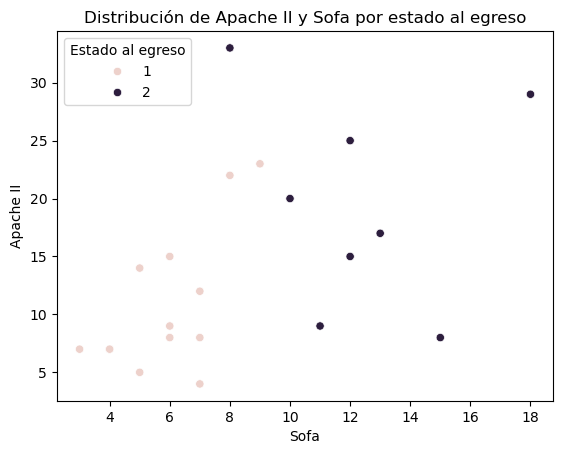

In [14]:
sns.scatterplot(x='Sofa', y='Apache II', hue='Estado al egreso', data=data) 
plt.title('Distribución de Apache II y Sofa por estado al egreso')
plt.legend(title='Estado al egreso')